In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from holoviews.plotting.bokeh.styles import alpha


In [3]:
path = 'data/Social_Network_Ads.csv'

data = pd.read_csv(path)

data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
df = data.drop(['Gender', 'User ID'], axis =1).copy()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [6]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)



SVC(kernel='linear', random_state=0)

In [9]:
testData = sc.transform([[30, 87000]])

print(classifier.predict(testData))

[0]


In [10]:
y_preds = classifier.predict(X_test)

print(np.concatenate((y_preds.reshape(len(y_preds), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_preds)

print(cm)
accuracy_score(y_test, y_preds)

[[66  2]
 [ 8 24]]


0.9

C:\Users\SHUVO\AppData\Local\Temp\ipykernel_33956\3331797575.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


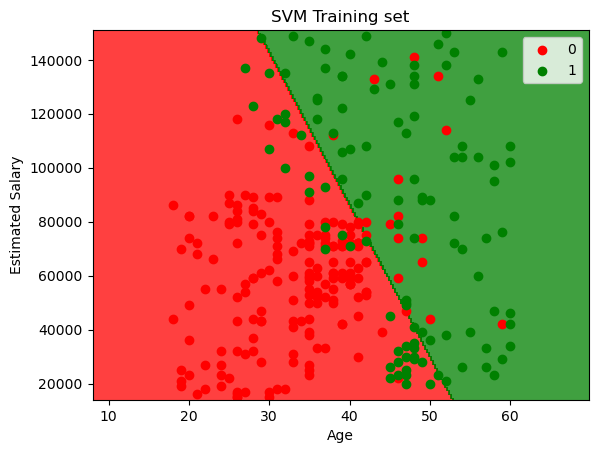

In [12]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
                     )

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green'))
             )

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j
                )
    
plt.title('SVM Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

